In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Description :
The dataset provides information on a child's weight at birth plus some stats on the child's mother: is she a smoker or not, her height, her weight, the gestation length, and so on

| Variable | Description|
| :------- | :------: | 
| case | case number of patient | 
| btw | birth weight of baby | 
| gestation | no of weeks of complete pregnancy| 
| parity | number of previous pregnancies| 
| age | age of patient| 
| height | height of patient| 
| weight | weight of patient| 
| smoke | whether a smoker or non smoker| 

Target Varible:
***btw

In [2]:
#read babies dataset
data = pd.read_csv('babies.csv')

In [3]:
#load data with head()
data.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [4]:
#removing duplicates before treating null
data.drop_duplicates().count()

case         1236
bwt          1236
gestation    1223
parity       1236
age          1234
height       1214
weight       1200
smoke        1226
dtype: int64

In [5]:
#Fetch info part of dataset which says total columns, rows and datatypes for each columns, It helps in finding out null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


#### We have null values present on respective columns.
1) gestation
2) age
3) height
4) weight
5) smoke

#### Scikit-learn provides several tools within its impute module to handle missing values in datasets, a crucial step in data preprocessing for machine learning. The primary classes for this purpose are SimpleImputer, KNNImputer, and IterativeImputer.

In [6]:
#We will treat null values first
from sklearn.impute import SimpleImputer
# Initialize the imputer with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to the column and transform it
data['gestation'] = imputer.fit_transform(data[['gestation']]) # we have fillna() as well, to fill data
data['age'] = imputer.fit_transform(data[['age']])
data['height'] = imputer.fit_transform(data[['height']])
data['weight'] = imputer.fit_transform(data[['weight']])
data['smoke'] = imputer.fit_transform(data[['smoke']])

In [7]:
#Verify whether null values present in dataset or not
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
data.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.000000,0,27.0,62.0,100.0,0.0
1,2,113,282.000000,0,33.0,64.0,135.0,0.0
2,3,128,279.000000,0,28.0,64.0,115.0,1.0
3,4,123,279.338512,0,36.0,69.0,190.0,0.0
4,5,108,282.000000,0,23.0,67.0,125.0,1.0


In [9]:
#"smoke" colmun is showing as floating value which is not looking good
data['smoke'] = pd.to_numeric(data.smoke, errors='coerce')

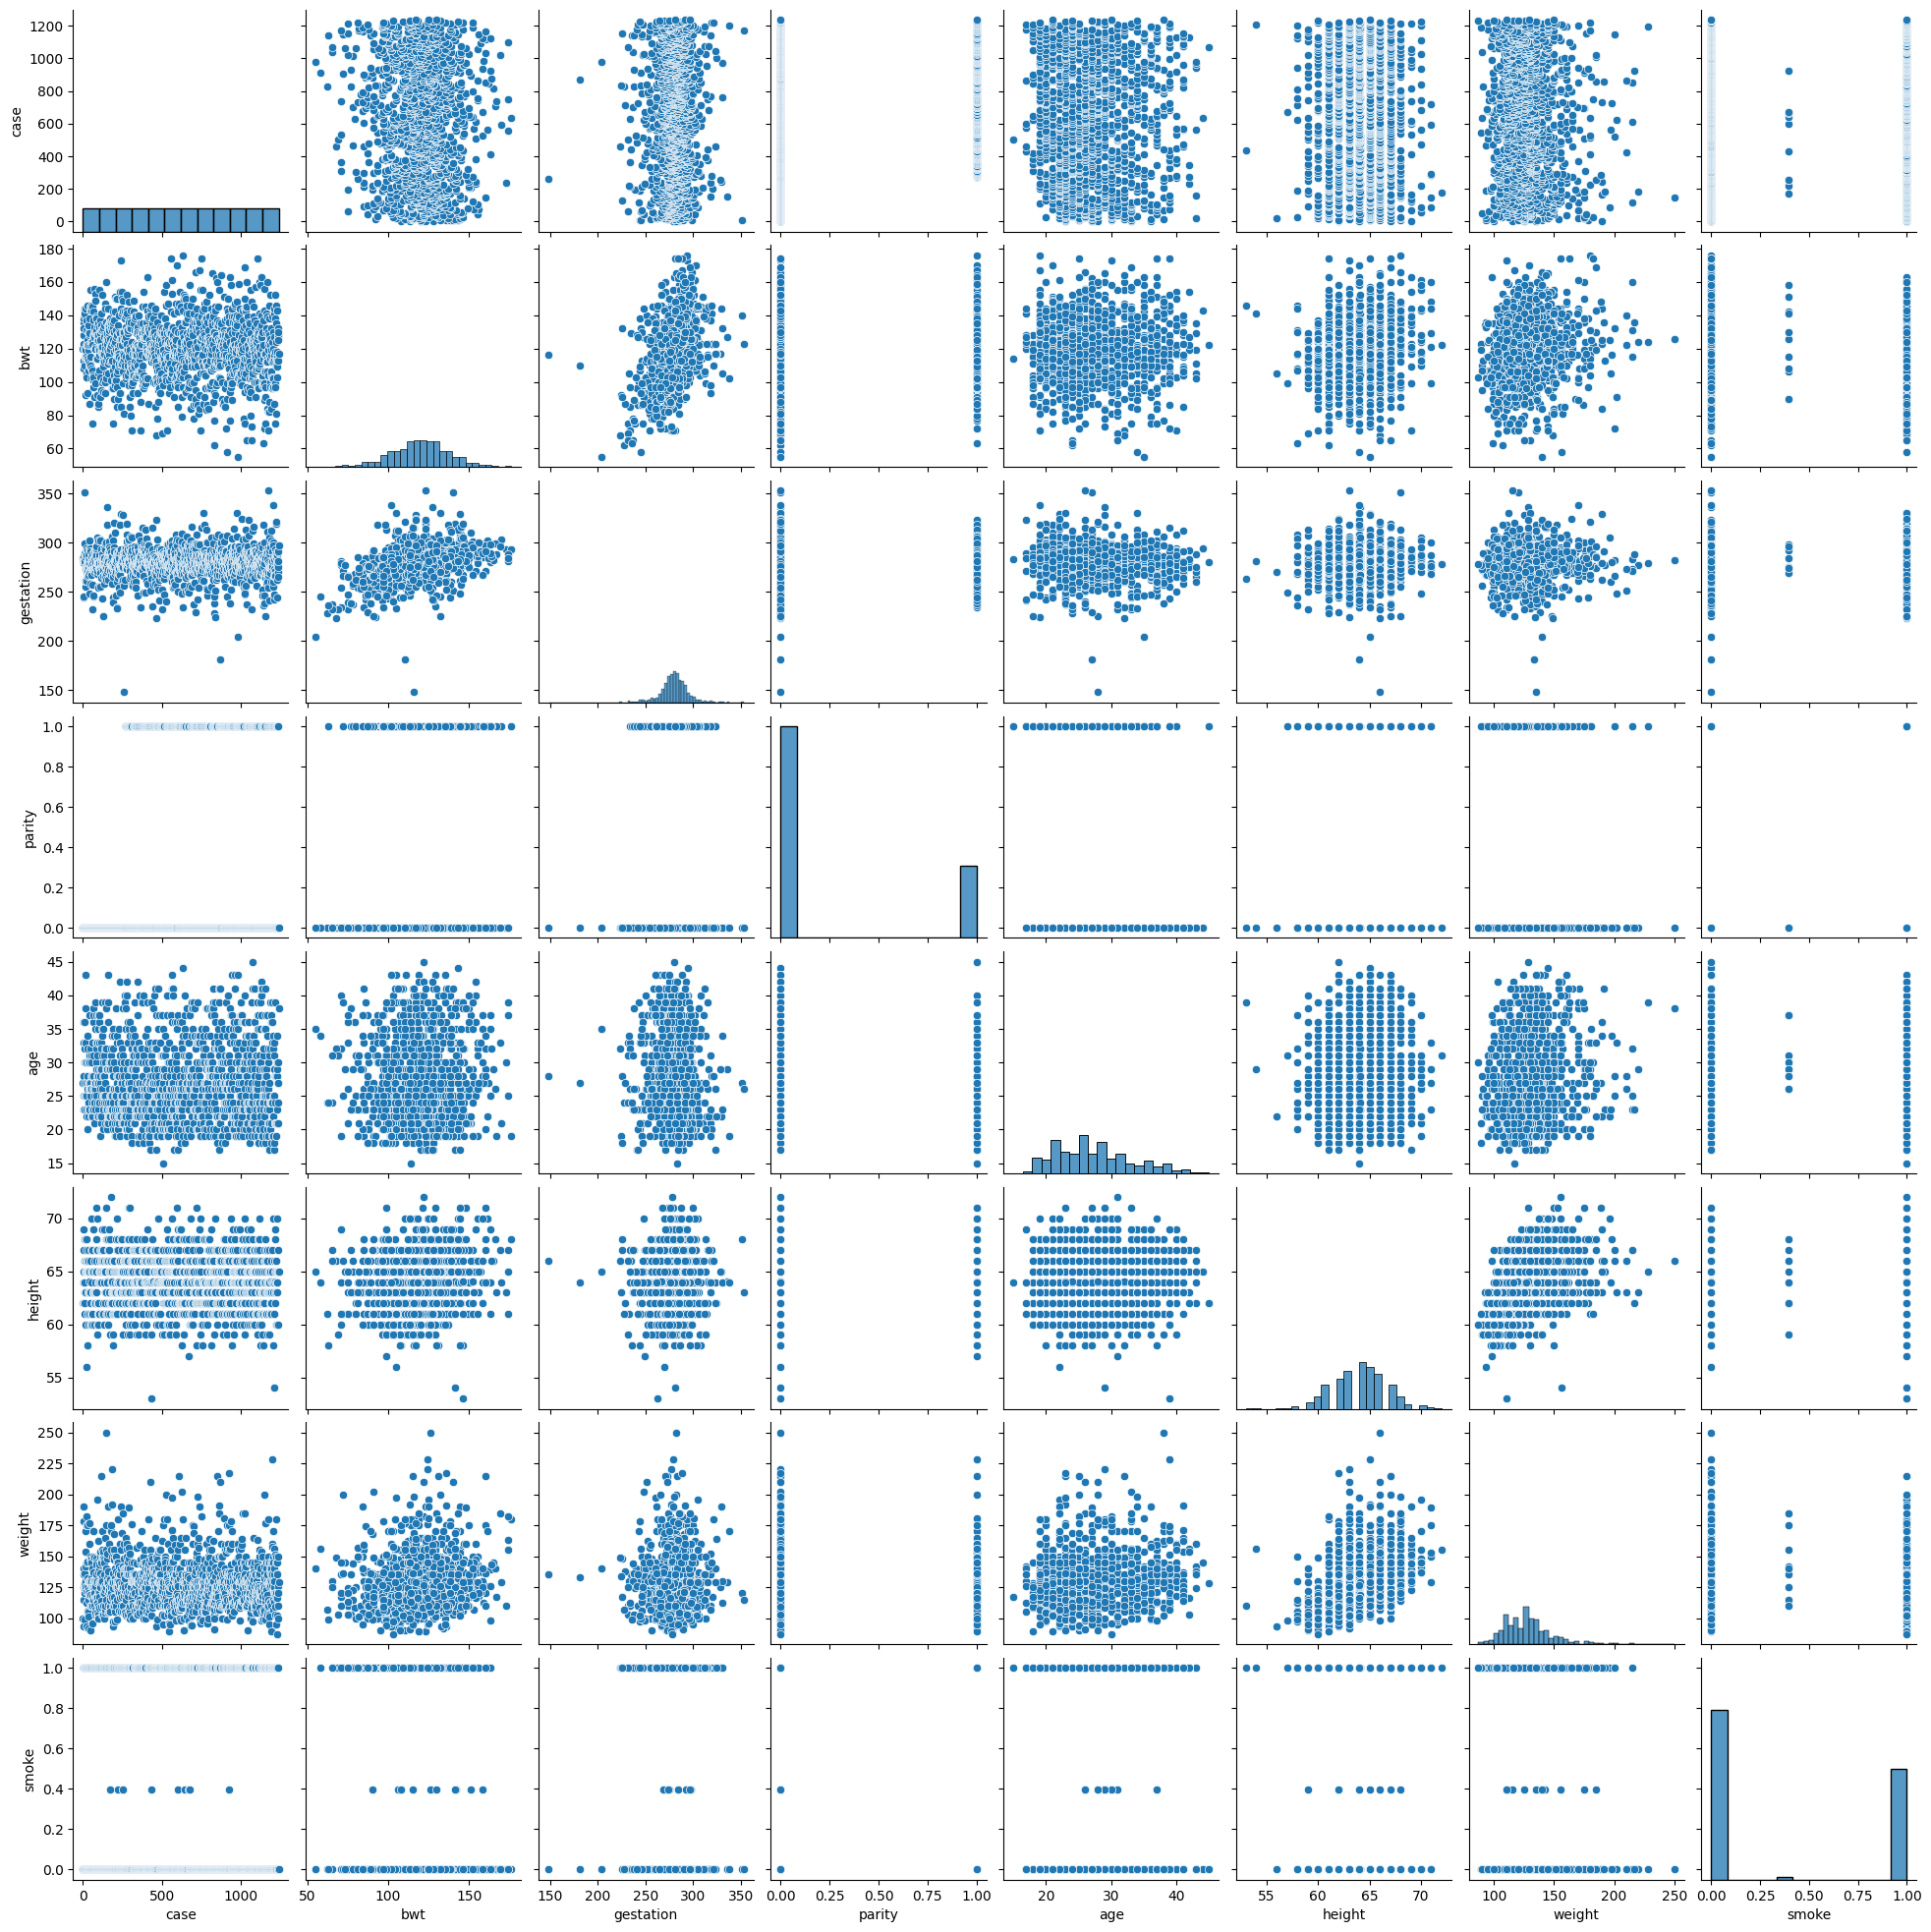

In [10]:
sns.pairplot(data=data)

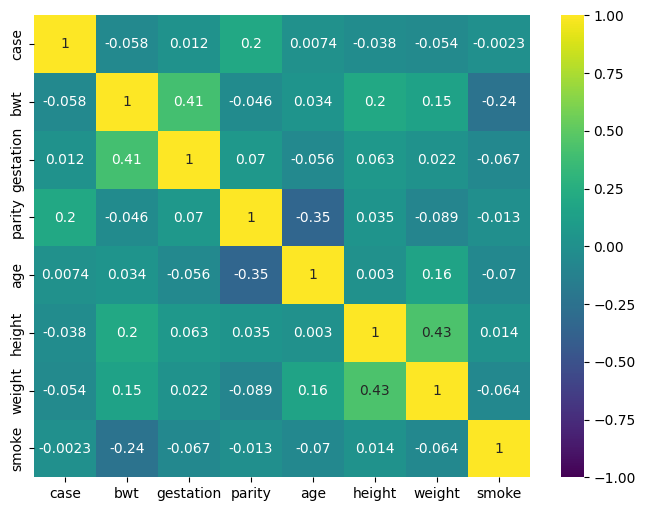

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='viridis')
plt.show()

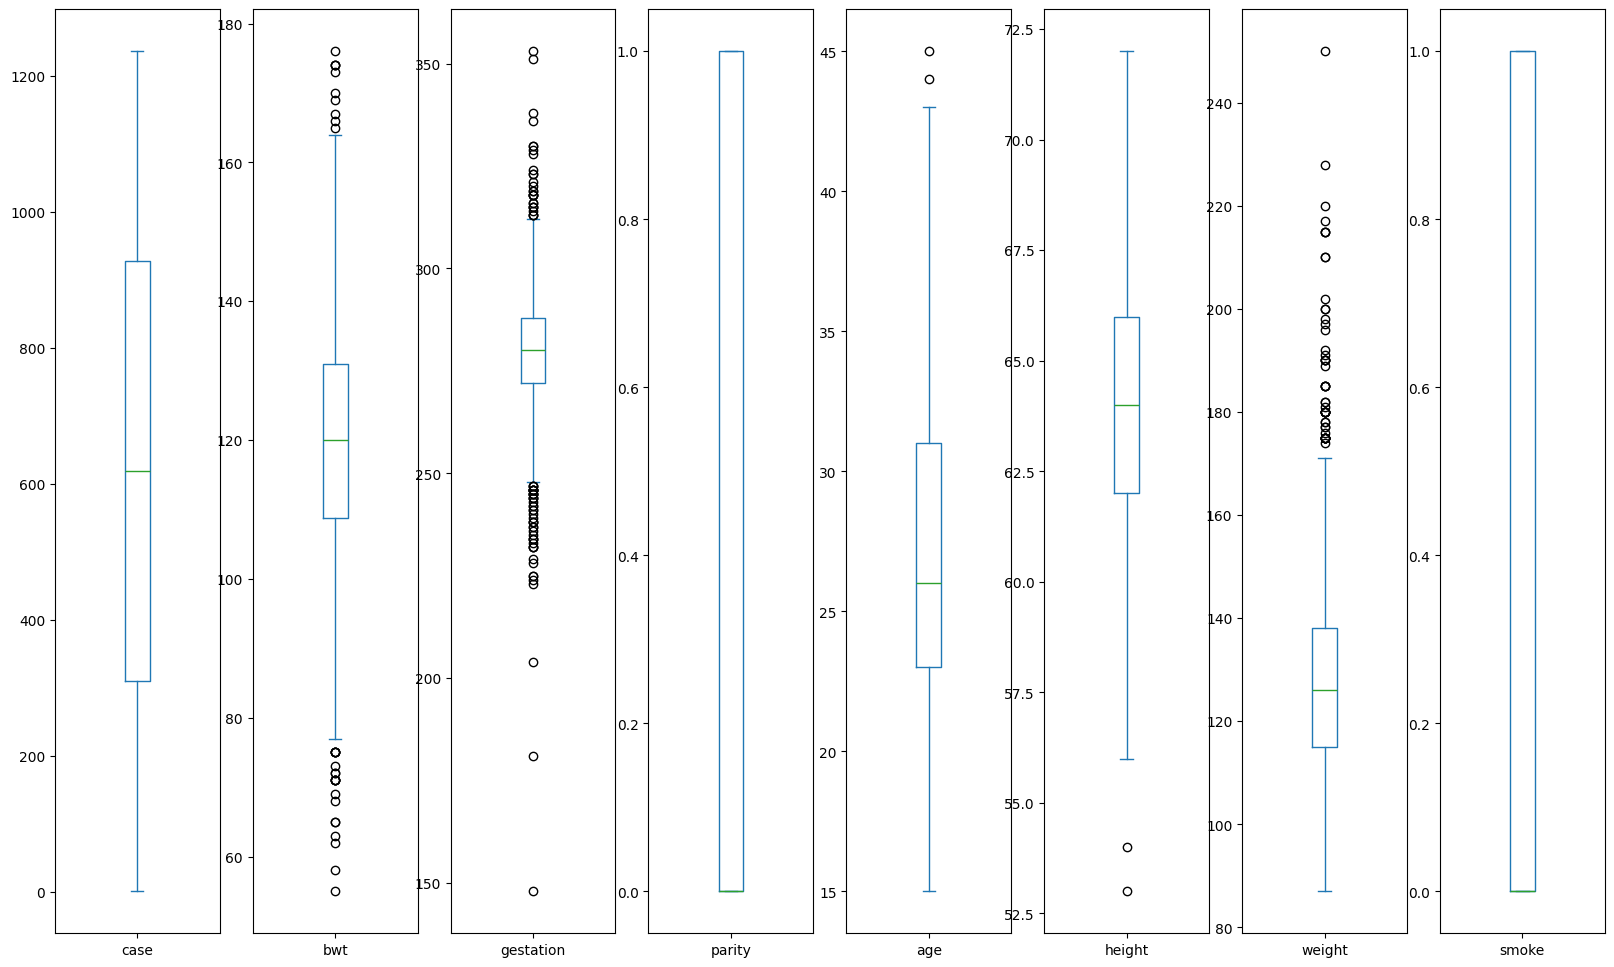

In [14]:
data.plot(kind="box",subplots=True,figsize=(20,12))
plt.show()

In [15]:
data.drop(columns=["case"], inplace=True)

In [16]:
data.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

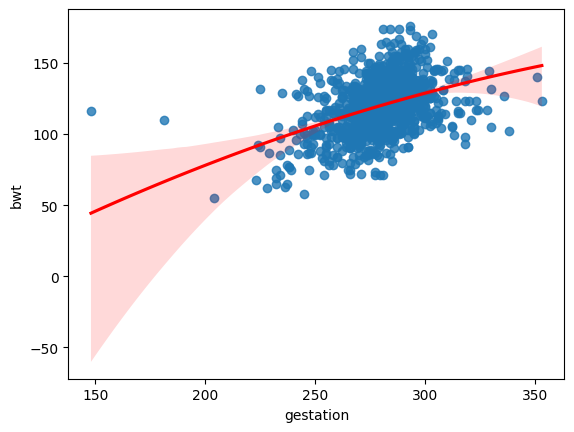

In [17]:
sns.regplot(x="gestation",
            y="bwt",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

<Axes: xlabel='parity', ylabel='count'>

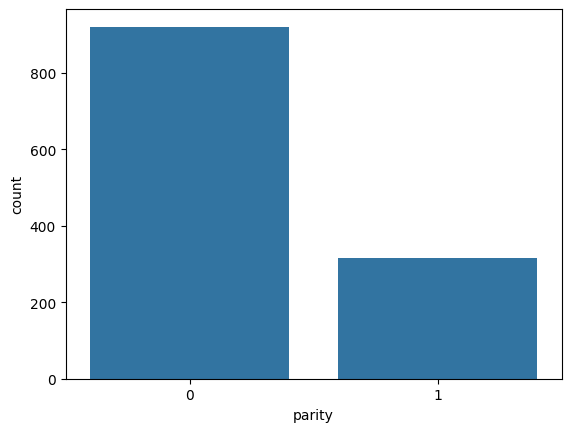

In [18]:
sns.countplot(x="parity", data=data)

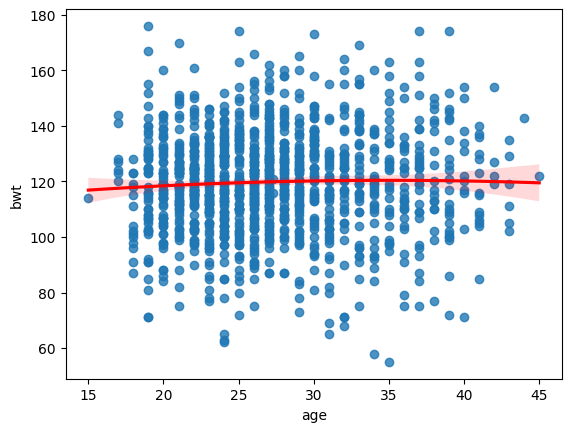

In [19]:
sns.regplot(x="age",
            y="bwt",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

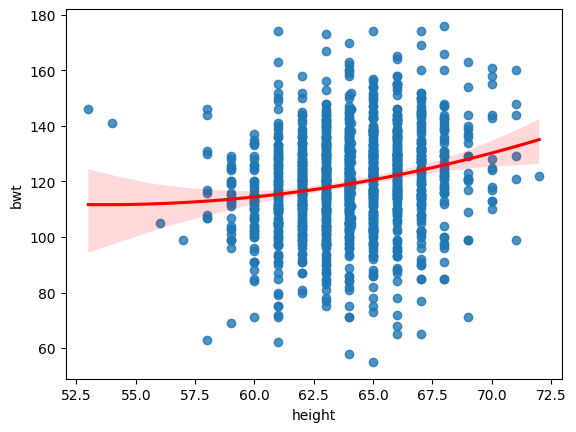

In [20]:
sns.regplot(x="height",
            y="bwt",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

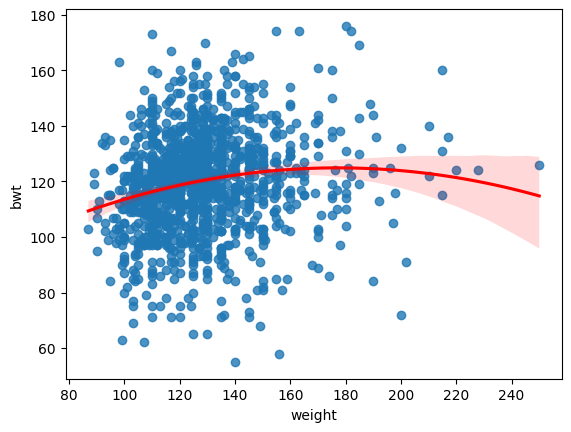

In [21]:
sns.regplot(x="weight",
            y="bwt",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

<Axes: xlabel='smoke', ylabel='count'>

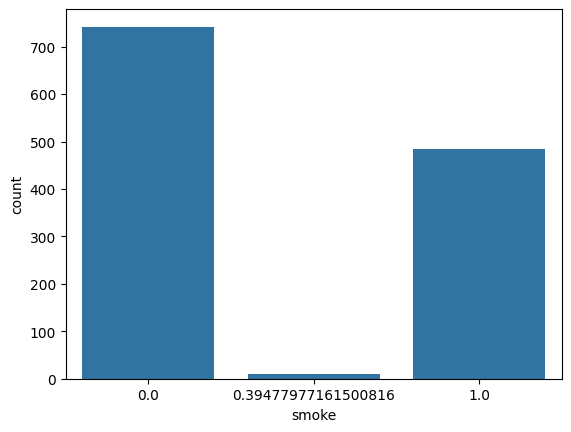

In [22]:
sns.countplot(x="smoke", data=data)

In [23]:
# Define features (X) and target (y)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_absolute_error, r2_score
X = data.drop("bwt", axis=1)
y = data.bwt

In [24]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [25]:
# Train Quantile Regression models for different quantiles
quantiles = [0.1, 0.5, 0.9]
models = {}

In [26]:
for q in quantiles:
    qr = QuantileRegressor(quantile=q, alpha=0.5, solver='highs') 
    #solver = 'highs'  or  'highs-ds'  or  'highs-ipm' 
    #alpha = Regularization
    qr.fit(X_train, y_train)
    models[q] = qr
    print(f"Model for quantile {q} trained successfully.")

Model for quantile 0.1 trained successfully.
Model for quantile 0.5 trained successfully.
Model for quantile 0.9 trained successfully.


In [27]:
# Evaluate model performance
results = []
for q, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Quantile": q, "MAE": mae, "R2": r2})
    print(f"Quantile: {q} | MAE: {mae:.4f} | R²: {r2:.4f}")

results_df = pd.DataFrame(results)
print("\nPerformance Summary:\n", results_df)
print("model score", model.score(X_test,y_test))
#If your target values comes between "0-100" then 15-25 score is moderate
#If your target values comes between "0-500" then 15-25 score is very good
#If your target values comes between "0-50" then 15-25 score is very poor, needs improvement
#To improve MAE, you can add more predictive variables, use cross validations.

Quantile: 0.1 | MAE: 21.1520 | R²: -0.7777
Quantile: 0.5 | MAE: 13.5394 | R²: 0.1840
Quantile: 0.9 | MAE: 24.8742 | R²: -1.3992

Performance Summary:
    Quantile        MAE        R2
0       0.1  21.151950 -0.777657
1       0.5  13.539424  0.184030
2       0.9  24.874221 -1.399160
model score -1.3991603024166865


In [28]:
model_10percent = models[0.1]
y_pred_median10 = model_10percent.predict(X_test)
model_10percent.coef_

array([0.35714286, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [29]:
#Visualization (True vs Predicted for Median Quantile)
model_90percent = models[0.9]
y_pred_median90 = model_90percent.predict(X_test)
model_90percent.coef_

array([0.16306052, 0.        , 0.        , 0.        , 0.03606146,
       0.        ])

In [30]:
#Visualization (True vs Predicted for Median Quantile)
median_model = models[0.5]
y_pred_median = median_model.predict(X_test)
median_model.coef_

array([0.38644068, 0.        , 0.        , 0.        , 0.05423729,
       0.        ])

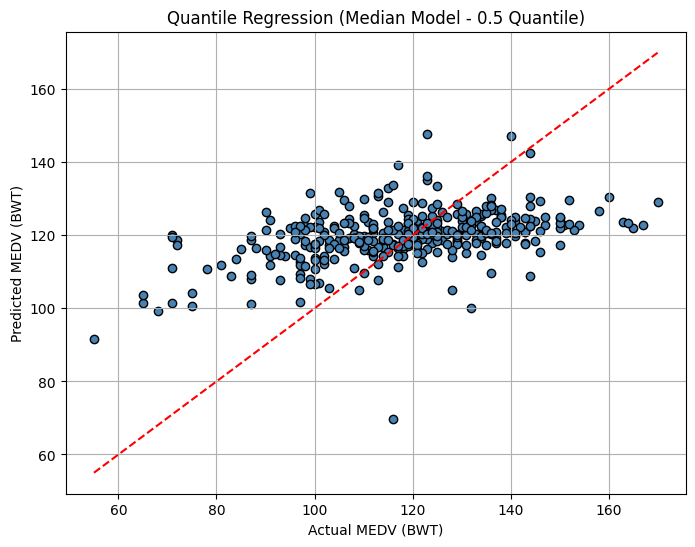

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_median, color='steelblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Quantile Regression (Median Model - 0.5 Quantile)")
plt.xlabel("Actual MEDV (BWT)")
plt.ylabel("Predicted MEDV (BWT)")
plt.grid(True)
plt.show()

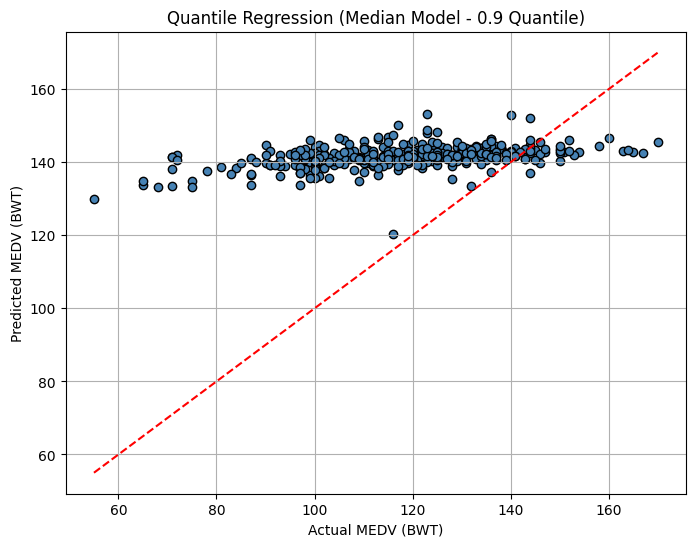

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_median90, color='steelblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Quantile Regression (Median Model - 0.9 Quantile)")
plt.xlabel("Actual MEDV (BWT)")
plt.ylabel("Predicted MEDV (BWT)")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Residual Distribution')

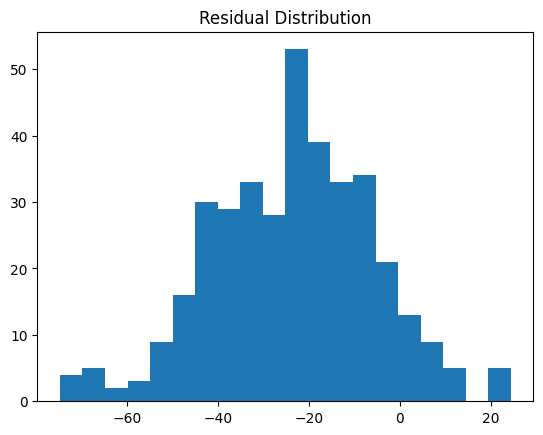

In [33]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")

In [34]:
from sklearn.metrics import mean_pinball_loss
loss = mean_pinball_loss(y_test, y_pred_median, alpha=0.5)
print("pinball loss for median value of 0.5:", loss)

pinball loss for median value of 0.5: 6.769711821934256


In [35]:
loss = mean_pinball_loss(y_test, y_pred_median10, alpha=0.5)
print("pinball loss for median value of 0.1:", loss)

pinball loss for median value of 0.1: 10.57597514082385


In [36]:
loss = mean_pinball_loss(y_test, y_pred_median90, alpha=0.5)
print("pinball loss for median value of 0.9:", loss)

pinball loss for median value of 0.9: 12.437110677155466
